## Desafío S4 - Random Forest

* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios
de inmuebles, medidos con la **variableSale_Price**

### Ejercicio 1: Preparación del ambiente de trabajo

#### Importe las librerías clásicas a utilizar.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#De manera adicional importe las funciones y clases necesarias para generar un
#desempeño de métricas en problemas de regresión.
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


* Elimine la columna'Unnamed: 0' cuando cargue los datos.

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


### Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación
serializados la sesión pasada y evalúe el desempeño del modelo de su compañero
con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden
ser los causantes.

Modelo propio

In [3]:
def cargar_modelo(id_matrices_tr_ts, id_model):
    matriz = pd.read_pickle(f'{id_matrices_tr_ts}.sav')
    X_train, X_test, y_train, y_test = matriz[0], matriz[1], matriz[2], matriz[3]
    modelo = pd.read_pickle(f'{id_model}.sav')
    return X_train, X_test, y_train, y_test, modelo

In [4]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl, modelo_dl =cargar_modelo('matrices_train_test', 'diego_lizana_actividad07')

In [5]:
def metricas(X_test, y_test, model):
    print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)).round(5))
    print("Test MAE:", median_absolute_error(y_test, model.predict(X_test)).round(5))
    print("Test R2:", r2_score(y_test, model.predict(X_test)).round(5))

In [6]:
metricas(X_test_dl, y_test_dl, modelo_dl)

Test MSE: 1276694856.60852
Test MAE: 15094.44
Test R2: 0.80861


Modelo Marco Cordero

In [7]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc, modelo_mc =cargar_modelo('matrices_marco', 'marco_cordero_actividad07')

In [8]:
print(X_train_mc.shape)
print(X_test_mc.shape)
print(y_train_mc.shape)
print(y_test_mc.shape)

(2051, 10)
(2051,)
(879, 10)
(879,)


In [9]:
X_test_mc_fix =  y_train_mc
y_train_mc_fix =  X_test_mc

In [10]:
print(X_train_mc.shape)
print(X_test_mc_fix.shape)
print(y_train_mc_fix.shape)
print(y_test_mc.shape)

(2051, 10)
(879, 10)
(2051,)
(879,)


In [11]:
X_train_mc.columns

Index(['Garage_Cars', 'Gr_Liv_Area', 'Exter_Qual_Fair', 'Total_Bsmt_SF',
       'Year_Remod_Add', 'First_Flr_SF', 'Longitude', 'Kitchen_Qual_Poor',
       'Year_Built', 'Lot_Area'],
      dtype='object')

In [12]:
modelo_mc.fit(X_test_mc_fix, y_test_mc)

DecisionTreeRegressor(max_depth=7, max_features=8)

In [13]:
metricas(X_test_mc_fix, y_test_mc, modelo_mc)

Test MSE: 442149096.61669
Test MAE: 10378.22222
Test R2: 0.92926


In [14]:
metricas(X_test_dl, y_test_dl, modelo_dl)

Test MSE: 1276694856.60852
Test MAE: 15094.44
Test R2: 0.80861


* Los indicadores R2 y MSE son mejores en el modelo_mc, las 10 variables explican de mejor forma la variabilidad que las 10 seleccionadas en el modelo_dl:
    - mc: ['Garage_Cars', 'Gr_Liv_Area', 'Exter_Qual_Fair', 'Total_Bsmt_SF', 'Year_Remod_Add', 'First_Flr_SF', 'Longitude','Kitchen_Qual_Poor','Year_Built', 'Lot_Area']
    - dl: ['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'First_Flr_SF','Exual_Typical', 'Year_Built', 'Year_Remod_Add', 'Fireplaces','Lot_Area', 'Latitude']

### Ejercicio 3: Evaluación Random Forest

##### En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiper parámetros, sólo declarando la semilla pseudoaleatoria.

In [15]:
rf_houses = RandomForestClassifier(random_state=1991).fit(X_train_dl, y_train_dl)

c:\Users\USUARIO\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:57: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warnings.warn(


In [16]:
metricas(X_test_dl, y_test_dl, rf_houses)

Test MSE: 1361271243.48501
Test MAE: 15000.0
Test R2: 0.79593


* El valor de r2 baja, por ende las variables explican un poco menos el comportamiento del vec obj, de la mano el MSE aumenta.
* El lado positivo es que MAE tiene la menor brecha con respecto a la media.

###  Ejercicio 4: Reporte las métricas de desempeño

##### Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiper parámetros:

In [17]:
n_estimators= np.linspace(20, 1000, 10).astype(int)
n_estimators

array([  20,  128,  237,  346,  455,  564,  673,  782,  891, 1000])

In [18]:
grilla = {'n_estimators': n_estimators,
           'max_features':[None, 'sqrt', 'log2'] }

In [19]:
modelo_grilla = GridSearchCV(estimator=RandomForestClassifier(random_state=1991),
                            param_grid=grilla, cv=3)

In [20]:
X_train_dl.shape

(1963, 10)

In [21]:
y_train_dl

2138    130000
907      60000
317     174000
2165    168675
875     178000
         ...  
519     229800
2445    625000
1331    109500
1102    350000
1344    162900
Name: Sale_Price, Length: 1963, dtype: int64

* A continuacion, dada la falla en el Kernel, tendre que ejecutar un modelo a la vez y reiniciar el kernel, por lo que la funcion del codigo lista_oob.append(modelo.oob_score_) sera meramente ilustrativo, ya que se guardan los elementos de manera manual debido a los problemas de ejecucion en el notebook.

In [22]:
stop

NameError: name 'stop' is not defined

In [ ]:
modelo_grilla.fit(X_train_dl, y_train_dl)

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1991),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': array([  20,  128,  237,  346,  455,  564,  673,  782,  891, 1000])})

In [ ]:
best_tree = modelo_grilla.best_estimator_
best_tree

RandomForestClassifier(max_features=None, n_estimators=564, random_state=1991)

In [ ]:
rf_none_low = RandomForestClassifier(n_estimators=100,max_features=None,
                                        oob_score=True, random_state=1991,
                                        n_jobs=-1)

In [ ]:
rf_none_low.fit(X_train_dl, y_train_dl)

RandomForestClassifier(max_features=None, n_jobs=-1, oob_score=True,
                       random_state=1991)

In [ ]:
lista_oob = [rf_none_low.oob_score_]
lista_oob

[0.011716760061130871]

In [ ]:
lista_oob =[0.011716760061130871]

In [ ]:
rf_none_low2 = RandomForestClassifier(n_estimators=280,max_features=None,
                                        oob_score=True, random_state=1991,
                                        n_jobs=-1)

In [ ]:
rf_none_low2.fit(X_train_dl, y_train_dl)

RandomForestClassifier(max_features=None, n_estimators=280, n_jobs=-1,
                       oob_score=True, random_state=1991)

In [ ]:
rf_none_low2.oob_score_

0.012226184411614827

In [ ]:
lista_oob = [0.011716760061130871, 0.012226184411614827]

In [30]:
rf_none_best = RandomForestClassifier(n_estimators=564,max_features=None,
                                        oob_score=True, random_state=1991,
                                        n_jobs=-1)

In [31]:
rf_none_best.fit(X_train_dl, y_train_dl)

RandomForestClassifier(max_features=None, n_estimators=564, n_jobs=-1,
                       oob_score=True, random_state=1991)

In [32]:
rf_none_best.oob_score_

0.011207335710646915

In [ ]:
lista_oob = [0.011716760061130871, 0.012226184411614827, 0.011207335710646915]

In [ ]:
rf_none_hig = RandomForestClassifier(n_estimators=700,max_features=None,
                                        oob_score=True, random_state=1991,
                                        n_jobs=-1)

In [ ]:
rf_none_hig.fit(X_train_dl, y_train_dl)

RandomForestClassifier(max_features=None, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1991)

In [ ]:
rf_none_hig.oob_score_

0.011716760061130871

In [ ]:
lista_oob = [0.011716760061130871, 0.012226184411614827,
             0.011207335710646915, 0.011716760061130871]

In [23]:
rf_none_hig2 = RandomForestClassifier(n_estimators=900,max_features=None,
                                        oob_score=True, random_state=1991,
                                        n_jobs=-1)

In [24]:
rf_none_hig2.fit(X_train_dl, y_train_dl)

RandomForestClassifier(max_features=None, n_estimators=900, n_jobs=-1,
                       oob_score=True, random_state=1991)

In [25]:
rf_none_hig2.oob_score_

0.011716760061130871

In [26]:
lista_oob = [0.011716760061130871, 0.012226184411614827,
              0.011207335710646915, 0.011716760061130871,
              0.011716760061130871]

* cual es la tasa de error

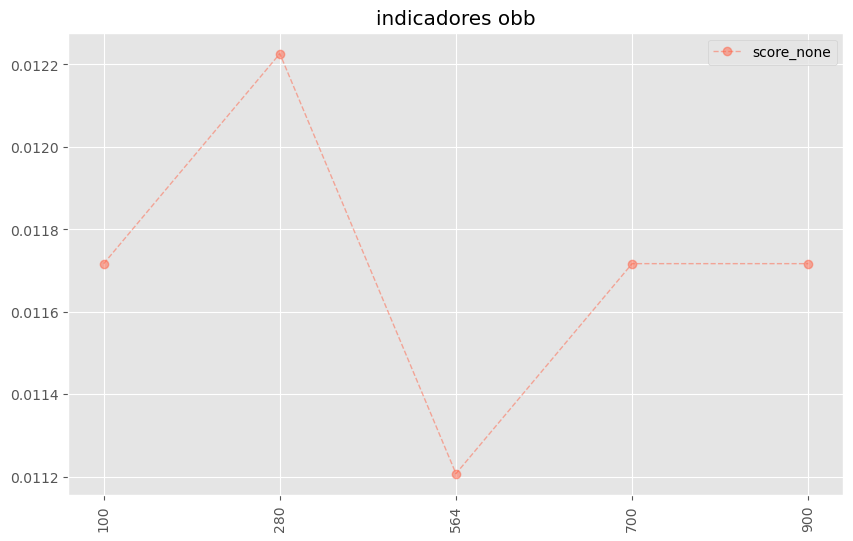

In [27]:
plt.plot(lista_oob, 'o--', lw=1,alpha=.5,color='tomato', label=r'score_none')
plt.xticks(range(len(lista_oob)),[100,280,564,700,900], rotation=90)
plt.title('indicadores obb')
plt.legend()

Esto nos indica que con n_estimators = 564 minimizamos el error out of bag, es decir se obtiene el menor error con respecto a las observaciones que se dejaron fuera del arbol.

### Ejercicio 5: Refactoriza el modelo

La prueba en grilla nos arroja el mejor modelo que coincide con el mejor OOB

Random forest sin hiperparametros:
* Test MSE: 1361271243.48501
* Test MAE: 15000.0
* Test R2: 0.79593

In [33]:
metricas(X_test_dl, y_test_dl, rf_none_best)

Test MSE: 1351117807.03206
Test MAE: 15500.0
Test R2: 0.79745


In [ ]:
df['Sale_Price'].median()

160000.0

In [ ]:
y_train_dl.median()

162500.0

* El MSE disminuye y el R2 aumenta, lo que nos indica estar en frente a un mejor modelo.
* Por otro lado el MAE aumenta, sin embargo mirando los datos globales y de entrenamiento, se observa que se encuentra mas cercana a la mediana de ambos.